In [1]:
import numpy as np
import scipy.stats as ss
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [2]:
T = np.array([1, 10, 50, 100, 1000, 10000])
Hm0_SE = np.array([1.8, 2.2, 2.8, 3.0, 3.8, 4.5])
Tp_SE = np.array([5.5, 6, 6.6, 6.8, 7.5, 8.0])
Tm1_SE = np.array([5.0, 5.4, 6.0, 6.2, 6.7, 7.2])
U10_SE = np.array([15.2, 17.2, 22, 23.6, 28.4, 32.9])
HWL = np.array([1.09, 1.54, 2.24, 2.54, 3.5, 4.39]) + 0.006 * 75
LWL = np.array([1.14, 1.72, 2.18, 2.38, 3.02, 3.66]) + 0.004*75

Hm0_WW = np.array([2.5, 3.3, 3.8, 4.0, 4.7, 5.3])
Tp_WW = np.array([6.3, 6.9, 7.3, 7.5, 7.9, 8.3])
Tm1_WW = np.array([5.7, 6.2, 6.6, 6.7, 7.1, 7.4])
U10_WW = np.array([20.4, 24.7, 27.5, 28.8, 32.8, 36.4])

In [3]:
# W_SE = ss.weibull_min(Hm0_SE, T)

In [4]:
#Exceedance probability
def interp(Hm0_SE, T): 
    F = 1 - 1 / T
    print(F)

# Remove values where F is 0 or 1 to avoid log(0)
    valid = (F > 0) & (F < 1)
    F = F[valid]
    x = Hm0_SE[valid]

# Linearize Weibull CDF
    Y = np.log(-np.log(1 - F))
    X = np.log(x)

# Linear regression
    slope, intercept, r_value, _, _ = linregress(X, Y)
    k = slope
    lambda_ = np.exp(-intercept / k)

    print(f"Estimated Weibull parameters:\nShape (k) = {k:.4f}\nScale (λ) = {lambda_:.4f}")

# Plotting
    x_fit = np.linspace(min(x), max(x), 100)
    F_fit = 1 - np.exp(-(x_fit / lambda_) ** k)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # plt.subfigure(2, 1, 1)
    ax1.plot(x, F, 'o', label="Empirical CDF")
    ax1.plot(x_fit, F_fit, '-', label="Fitted Weibull CDF")
    ax1.set_xlabel('Hm0_SE')
    ax1.set_ylabel('F(x)')
    ax1.grid(True)
    ax1.legend()
    ax1.set_title("Weibull Fit from Return Periods (Safe)")
    # plt.show()


    T_fitted = np.logspace(0.1, 5, 100)  # e.g., from ~1.25 to 100,000 years
    F_fitted = 1 - 1 / T_fitted

    # Invert the Weibull CDF to get Hm0_SE values:
    Hm0_SE_fitted = lambda_ * (-np.log(1 - F_fitted))**(1 / k)

    # Plot
    # plt.subfigure(2,1, 2)
    # ax2.figure(figsize=(8,6))
    ax2.plot(T, Hm0_SE, 'o', label="Empirical Data")
    ax2.plot(T_fitted, Hm0_SE_fitted, '-', label="Fitted Weibull Model")
    ax2.set_xscale('log')
    ax2.set_xlabel('T[years]')
    ax2.set_ylabel("Hm0_SE (m)")
    ax2.set_title("Return Level Plot (Hm0_SE vs Return Period)")
    ax2.grid(True, which="both")
    ax2.legend()
    plt.tight_layout()

    T_target = 450
    F = 1 - 1 / T_target
    Hm0_SE_450 = lambda_ * (-np.log(1 - F))**(1 / k)

    print(f"{Hm0_SE} for T = {T_target} years: {Hm0_SE_450:.3f} meters")
    # plt.show()


[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 1.9204
Scale (λ) = 1.3919
[1.8 2.2 2.8 3.  3.8 4.5] for T = 450 years: 3.572 meters


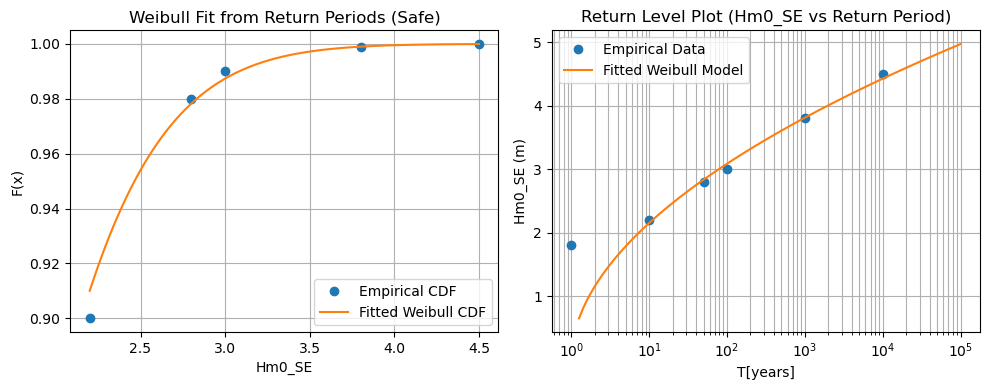

In [5]:
interp(Hm0_SE, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 4.7451
Scale (λ) = 4.9827
[5.5 6.  6.6 6.8 7.5 8. ] for T = 450 years: 7.296 meters


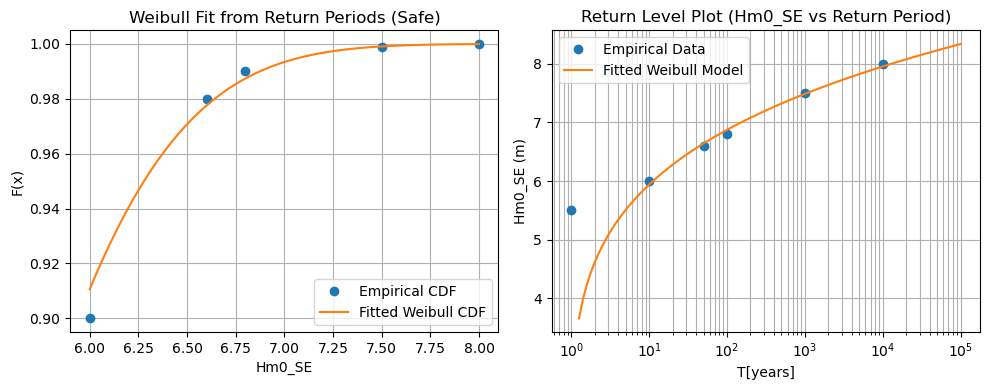

In [6]:
# Tp
interp(Tp_SE, T)

In [7]:
# interp(Tm1_SE, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 2.8668
Scale (λ) = 2.4024
[2.5 3.3 3.8 4.  4.7 5.3] for T = 450 years: 4.517 meters


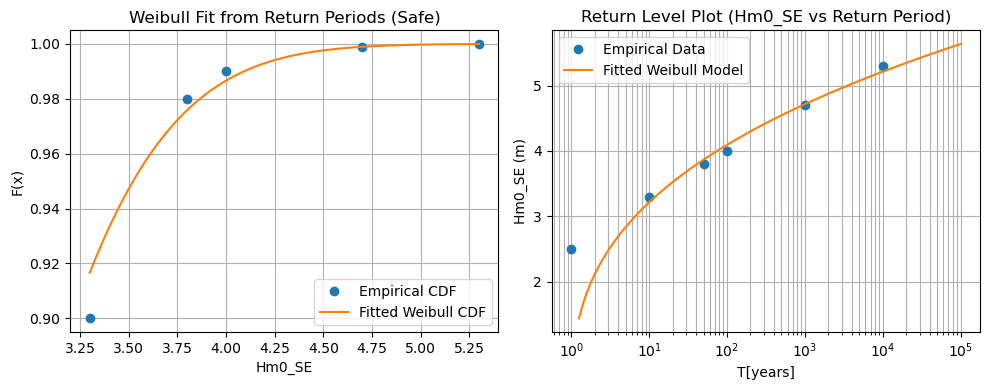

In [8]:
interp(Hm0_WW, T)


[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 7.4651
Scale (λ) = 6.1252
[6.3 6.9 7.3 7.5 7.9 8.3] for T = 450 years: 7.806 meters


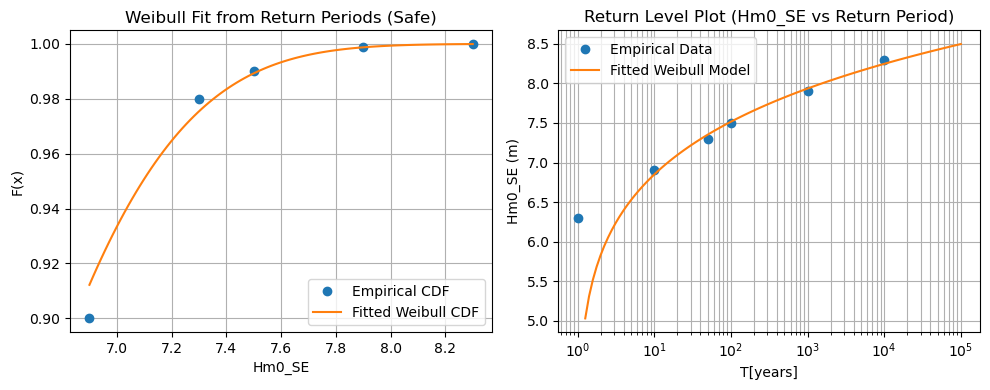

In [9]:
interp(Tp_WW, T)

In [10]:
# interp(Tm1_WW, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 2.1514
Scale (λ) = 11.6467
[15.2 17.2 22.  23.6 28.4 32.9] for T = 450 years: 27.011 meters


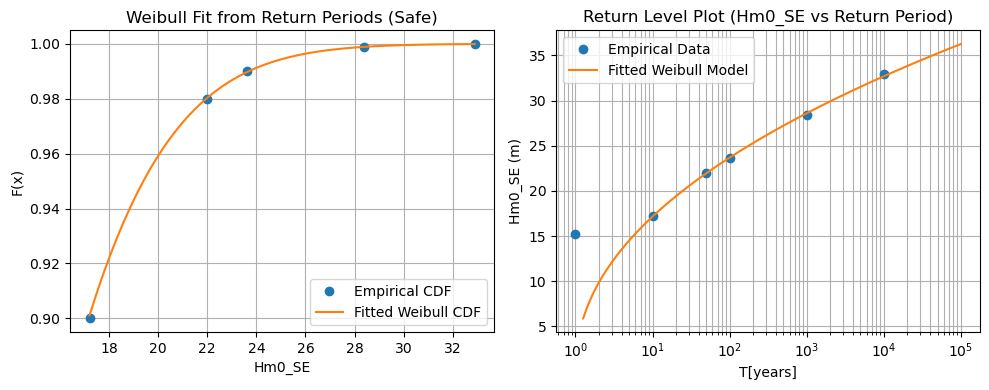

In [11]:
interp(U10_SE, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 3.4874
Scale (λ) = 18.9434
[20.4 24.7 27.5 28.8 32.8 36.4] for T = 450 years: 31.830 meters


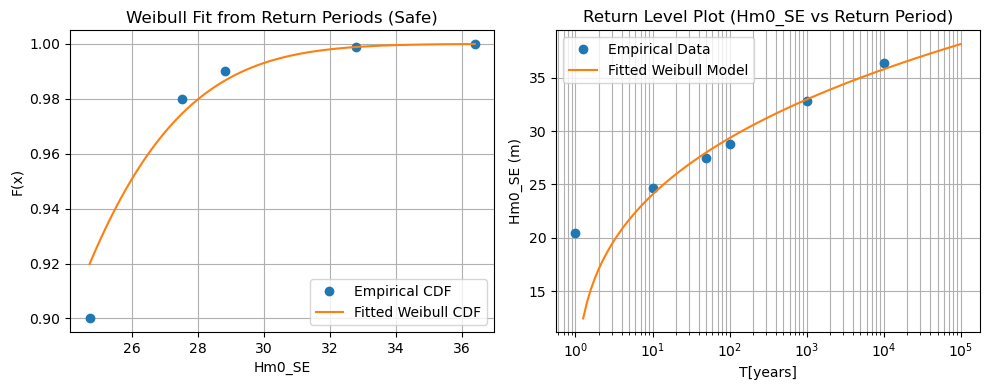

In [12]:
interp(U10_WW, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 1.5482
Scale (λ) = 1.1354
[1.54 1.99 2.69 2.99 3.95 4.84] for T = 450 years: 3.654 meters


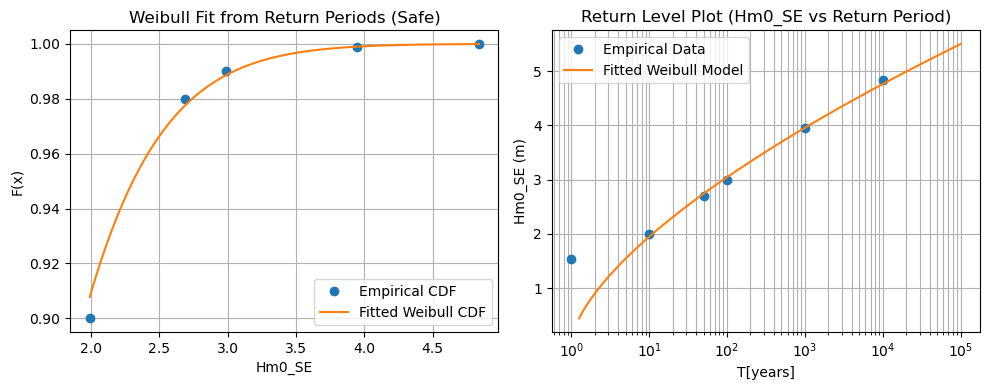

In [13]:
#Water levels
interp(HWL, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 2.0354
Scale (λ) = 1.2976
[1.44 2.02 2.48 2.68 3.32 3.96] for T = 450 years: 3.157 meters


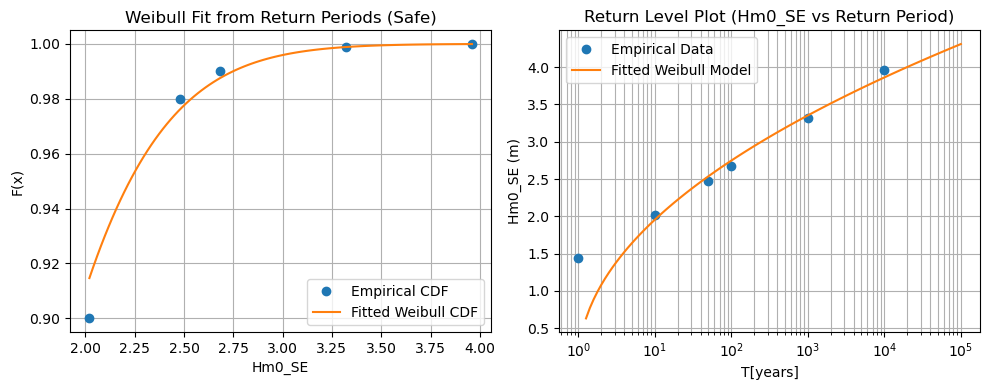

In [14]:
interp(LWL, T)

In [15]:
# interp(LWL, T)
#LWL has exponential distribution

def interpGum(Hm0_SE, T):
    # Given return period (T) and data (e.g., wave heights)
    T = np.array([1, 10, 50, 100, 1000, 10000])
    Hm0_SE = np.array([1.8, 2.2, 2.8, 3.0, 3.8, 4.5])

    # Step 1: Compute non-exceedance probabilities, avoid F=0 or F=1
    epsilon = 1e-6
    F = 1 - 1 / T
    F = np.clip(F, epsilon, 1 - epsilon)

    # Step 2: Transform for linearization
    Y = np.log(-np.log(F))  # Y = ln(-ln(F)), shape ~ linear in x
    X = Hm0_SE              # X = x (wave heights)

    # Step 3: Linear regression
    slope, intercept, r_value, _, _ = linregress(X, Y)

    # Step 4: Compute Gumbel parameters
    beta = -1 / slope
    mu = intercept * beta

    T_target = 450
    F_target = 1 - 1 / T_target
    x_450 = mu - beta * np.log(-np.log(F_target))
    print(f"Hm0_SE for T = {T_target} years: {x_450:.3f} meters")

    T_fit = np.logspace(0.1, 5, 200)
    F_fit = 1 - 1 / T_fit
    x_fit = mu - beta * np.log(-np.log(F_fit))

    plt.plot(T, Hm0_SE, 'o', label="Observed Data")
    plt.plot(T_fit, x_fit, '-', label="Fitted Gumbel")
    plt.xscale('log')
    plt.xlabel("Return Period (years)")
    plt.ylabel("Hm0_SE (m)")
    plt.title("Gumbel Fit: Hm0_SE vs Return Period")
    plt.grid(True, which='both')
    plt.legend()
    plt.tight_layout()
    plt.show()





Hm0_SE for T = 450 years: 3.547 meters


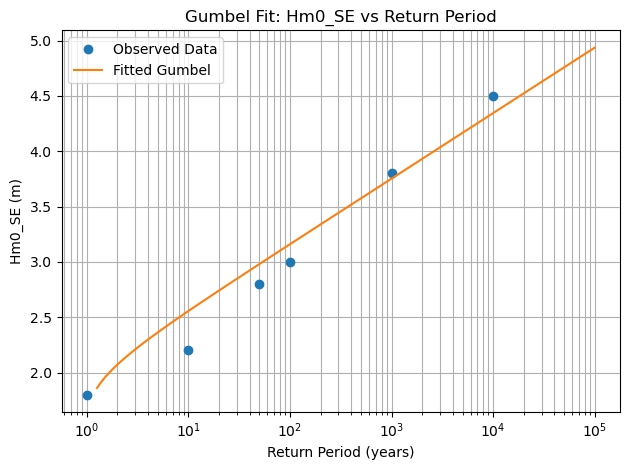

In [16]:
# LWL fit

interpGum(LWL, T)

In [17]:
#Now for wave direction east, wind direction north

U10_N = np.array([13.3, 17.8, 21.5, 23.2, 28.0, 32.2])
Hm0_E = np.array([1.5, 1.9, 2.3, 2.5, 3.2, 3.8])
Tp_E = np.array([5.3, 5.8, 6.2, 6.5, 7.1, 7.7])
Tm1_E = np.array([4.8, 5.2, 5.6, 5.8, 6.4, 6.9])

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 2.3087
Scale (λ) = 12.1414
[13.3 17.8 21.5 23.2 28.  32.2] for T = 450 years: 26.590 meters


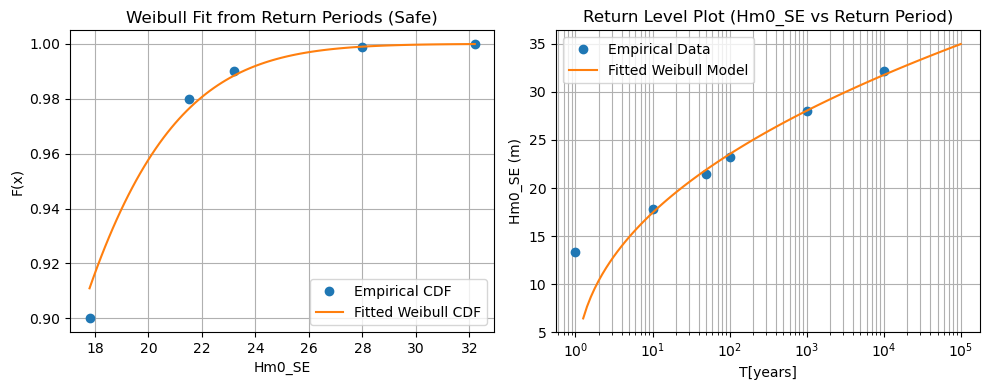

In [18]:
interp(U10_N, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 1.9335
Scale (λ) = 1.1769
[1.5 1.9 2.3 2.5 3.2 3.8] for T = 450 years: 3.001 meters


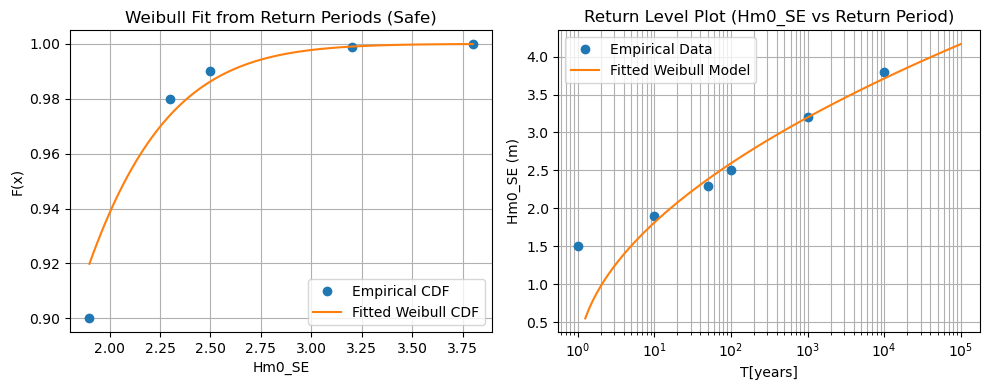

In [19]:
interp(Hm0_E, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 4.7189
Scale (λ) = 4.7455
[5.3 5.8 6.2 6.5 7.1 7.7] for T = 450 years: 6.964 meters


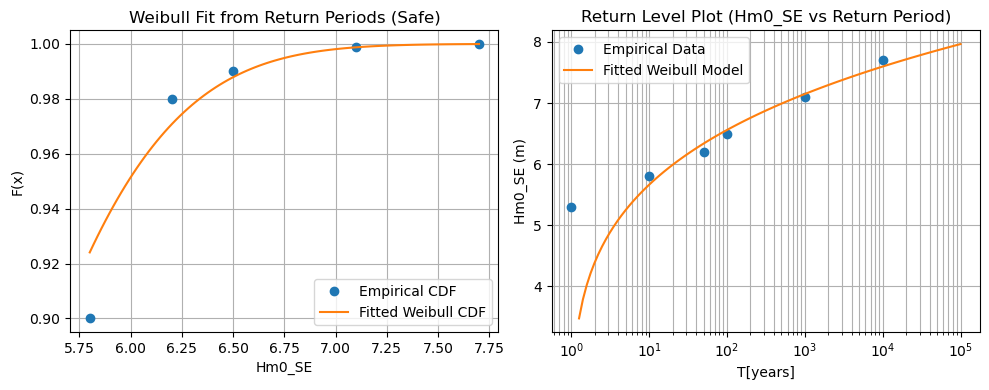

In [20]:
interp(Tp_E, T)

[0.     0.9    0.98   0.99   0.999  0.9999]
Estimated Weibull parameters:
Shape (k) = 4.7350
Scale (λ) = 4.2659
[4.8 5.2 5.6 5.8 6.4 6.9] for T = 450 years: 6.252 meters


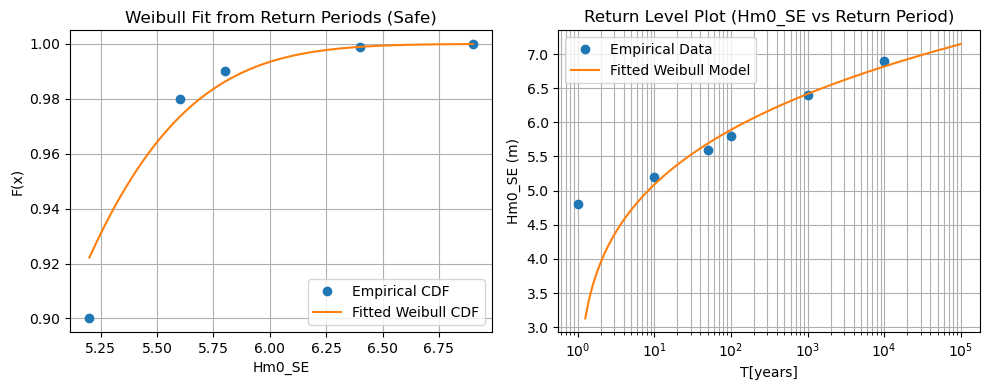

In [21]:
interp(Tm1_E, T)